In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
one_kelp = pd.read_csv("onekelp.csv", sep=';')
kelp = one_kelp[one_kelp["product"] == "KELP"]
kelp.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,-1.612671
7,1,200,KELP,2032,22,NaN,NaN,NaN,NaN,2035,22,NaN,NaN,NaN,NaN,2033.5,-1.631714
9,1,300,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,-1.672485
14,1,400,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,-1.662354


In [28]:
kelp_rename_dict = {
    "timestamp": "time",
    "bid_price_1": "bp1",
    "bid_price_2": "bp2",
    "bid_price_3": "bp3",
    "bid_volume_1": "bv1",
    "bid_volume_2": "bv2",
    "bid_volume_3": "bv3",
    "ask_price_1": "ap1",
    "ask_price_2": "ap2",
    "ask_price_3": "ap3",
    "ask_volume_1": "av1",
    "ask_volume_2": "av2",
    "ask_volume_3": "av3", 
    "mid_price": "mid",
    "profit_and_loss": "PnL"
}

kelp_df = kelp.rename(columns=kelp_rename_dict)
share_price = 2035
kelp_df["true_val"] = kelp_df["PnL"] + share_price
kelp_df.head()

,day,time,product,bp1,bv1,bp2,bv2,bp3,bv3,ap1,av1,ap2,av2,ap3,av3,mid,PnL,true_val
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000,2035.000000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,-1.612671,2033.387329
7,1,200,KELP,2032,22,NaN,NaN,NaN,NaN,2035,22,NaN,NaN,NaN,NaN,2033.5,-1.631714,2033.368286
9,1,300,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,-1.672485,2033.327515
14,1,400,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,-1.662354,2033.337646


In [29]:
def vwap(bid_prices, bid_vols, ask_prices, ask_vols):
    total_value = 0
    total_vol = 0
    for p, v in zip(bid_prices + ask_prices, bid_vols + ask_vols):
        if pd.notna(p) and pd.notna(v):
            total_value += p * v
            total_vol += v

    return total_value / total_vol if total_vol else float('nan')

In [30]:
kelp_df["vwap"] = kelp_df.apply(
    lambda row: vwap(
        [row["bp1"], row["bp2"], row["bp3"]],
        [row["bv1"], row["bv2"], row["bv3"]],
        [row["ap1"], row["ap2"], row["ap3"]],
        [row["av1"], row["av2"], row["av3"]]
    ),
    axis=1
)

kelp_df

,day,time,product,bp1,bv1,bp2,bv2,bp3,bv3,ap1,av1,ap2,av2,ap3,av3,mid,PnL,true_val,vwap
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000,2035.000000,2033.500000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,-1.612671,2033.387329,2033.489362
7,1,200,KELP,2032,22,NaN,NaN,NaN,NaN,2035,22,NaN,NaN,NaN,NaN,2033.5,-1.631714,2033.368286,2033.500000
9,1,300,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,-1.672485,2033.327515,2033.509434
14,1,400,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,-1.662354,2033.337646,2033.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,1,99500,KELP,2034,20,NaN,NaN,NaN,NaN,2038,20,NaN,NaN,NaN,NaN,2036.0,1.140259,2036.140259,2036.000000
2989,1,99600,KELP,2034,28,NaN,NaN,NaN,NaN,2038,28,NaN,NaN,NaN,NaN,2036.0,1.159546,2036.159546,2036.000000
2991,1,99700,KELP,2034,26,NaN,NaN,NaN,NaN,2038,26,NaN,NaN,NaN,NaN,2036.0,1.189819,2036.189819,2036.000000
2994,1,99800,KELP,2034,26,NaN,NaN,NaN,NaN,2038,26,NaN,NaN,NaN,NaN,2036.0,1.109253,2036.109253,2036.000000


In [31]:
def find_mms(row, num):
    bid_vols = [row[f'bv{i+1}'] for i in range(3)]
    bid_prices = [row[f'bp{i+1}'] for i in range(3)]
    ask_vols = [row[f'av{i+1}'] for i in range(3)]
    ask_prices = [row[f'ap{i+1}'] for i in range(3)]

    safe_bid_vols = np.nan_to_num(bid_vols, nan=-1)
    safe_ask_vols = np.nan_to_num(ask_vols, nan=-1)
    mm_bid_id = np.argmax(safe_bid_vols)
    mm_ask_id = np.argmax(safe_ask_vols)
    return pd.Series({
        'mm_bp': bid_prices[mm_bid_id],
        'mm_bv': bid_vols[mm_bid_id],
        'mm_ap': ask_prices[mm_ask_id],
        'mm_av': ask_vols[mm_ask_id],
    })

In [32]:
kelp_mm_full = kelp_df.copy()
kelp_mm_full[["mm_bp", "mm_bv", "mm_ap", "mm_av"]] = kelp_mm_full.apply(find_mms, axis=1)
kelp_mm = kelp_mm_full[["mm_bp", "mm_bv", "mm_ap", "mm_av", "mid", "vwap", "true_val"]].copy()
kelp_mm["mm_mid"] = (kelp_mm["mm_bp"] + kelp_mm["mm_ap"]) / 2
kelp_mm["mm_vwap"] = (kelp_mm["mm_bp"] * kelp_mm["mm_bv"] + kelp_mm["mm_ap"] * kelp_mm["mm_av"]) / (kelp_mm["mm_bv"] + kelp_mm["mm_av"])

TypeError: find_mms() missing 1 required positional argument: 'num'

In [ ]:
kelp_mm

,mm_bp,mm_bv,mm_ap,mm_av,mid,vwap,true_val,mm_mid,mm_vwap
2,2032.0,23.0,2035.0,23.0,2033.5,2033.500000,2035.000000,2033.5,2033.500000
3,2032.0,22.0,2035.0,22.0,2034.5,2033.489362,2033.387329,2033.5,2033.500000
7,2032.0,22.0,2035.0,22.0,2033.5,2033.500000,2033.368286,2033.5,2033.500000
9,2032.0,26.0,2035.0,26.0,2034.5,2033.509434,2033.327515,2033.5,2033.500000
14,2032.0,28.0,2035.0,28.0,2033.5,2033.500000,2033.337646,2033.5,2033.500000
...,...,...,...,...,...,...,...,...,...
2986,2034.0,20.0,2038.0,20.0,2036.0,2036.000000,2036.140259,2036.0,2036.000000
2989,2034.0,28.0,2038.0,28.0,2036.0,2036.000000,2036.159546,2036.0,2036.000000
2991,2034.0,26.0,2038.0,26.0,2036.0,2036.000000,2036.189819,2036.0,2036.000000
2994,2034.0,26.0,2038.0,26.0,2036.0,2036.000000,2036.109253,2036.0,2036.000000


In [ ]:
kelp_mm['true_val'].values

array([2035.        , 2033.3873291 , 2033.36828613, 2033.32751465,
       2033.33764648, 2033.36755371, 2033.31665039, 2033.31665039,
       2033.25634766, 2033.05407715, 2033.24682617, 2033.22692871,
       2033.11474609, 2033.17590332, 2033.16662598, 2033.21655273,
       2033.30725098, 2033.32727051, 2033.22570801, 2033.27575684,
       2033.29675293, 2033.2052002 , 2033.23608398, 2033.21643066,
       2033.11523438, 2033.19616699, 2033.12548828, 2033.20800781,
       2033.11669922, 2033.10656738, 2033.1673584 , 2033.3079834 ,
       2033.30773926, 2033.30773926, 2033.72338867, 2033.62512207,
       2033.58410645, 2033.6550293 , 2033.71557617, 2033.66516113,
       2033.73583984, 2033.57434082, 2033.48242188, 2033.51257324,
       2033.54284668, 2033.53295898, 2033.55456543, 2033.59545898,
       2033.58532715, 2033.61560059, 2033.61523438, 2033.61499023,
       2033.61499023, 2033.62548828, 2033.66638184, 2033.57397461,
       2033.60461426, 2033.67504883, 2033.64404297, 2033.66479

In [38]:
metrics = kelp_mm[['mid', 'vwap', 'mm_mid', 'mm_vwap']].subtract(kelp_mm['true_val'].values, axis=0)
metrics

,mid,vwap,mm_mid,mm_vwap
2,-1.500000,-1.500000,-1.500000,-1.500000
3,1.112671,0.102033,0.112671,0.112671
7,0.131714,0.131714,0.131714,0.131714
9,1.172485,0.181919,0.172485,0.172485
14,0.162354,0.162354,0.162354,0.162354
...,...,...,...,...
2986,-0.140259,-0.140259,-0.140259,-0.140259
2989,-0.159546,-0.159546,-0.159546,-0.159546
2991,-0.189819,-0.189819,-0.189819,-0.189819
2994,-0.109253,-0.109253,-0.109253,-0.109253


In [45]:
l1_score = metrics.apply(
    lambda col: col.abs().mean()
)
l2_score = metrics.apply(
    lambda col: (col**2).mean()
)

print(l1_score)
print(l2_score)

mid        0.383340
vwap       0.141499
mm_mid     0.142692
mm_vwap    0.135838
dtype: float64
mid        0.291831
vwap       0.030602
mm_mid     0.028210
mm_vwap    0.029296
dtype: float64


(array([  1.,   0.,   0.,   0.,   0., 302., 372., 324.,   0.,   1.]),
 array([-1.5       , -1.27042236, -1.04084473, -0.81126709, -0.58168945,
        -0.35211182, -0.12253418,  0.10704346,  0.33662109,  0.56619873,
         0.79577637]),
 <BarContainer object of 10 artists>)

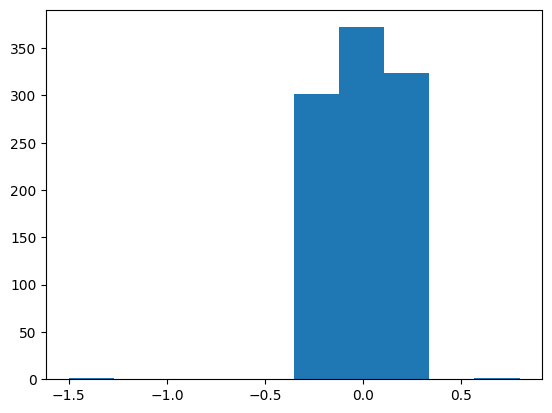

In [ ]:
plt.hist(metrics["mm_mid"])

(array([  1.,   0.,   0.,  32., 551., 413.,   2.,   0.,   0.,   1.]),
 array([-1.5       , -1.19111202, -0.88222404, -0.57333606, -0.26444807,
         0.04443991,  0.35332789,  0.66221587,  0.97110385,  1.27999183,
         1.58887982]),
 <BarContainer object of 10 artists>)

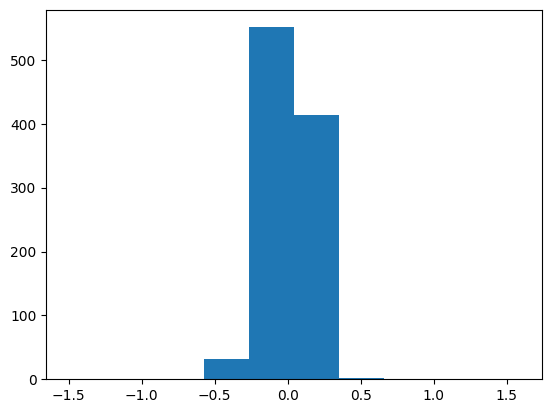

In [47]:
plt.hist(metrics["mm_vwap"])

(array([  1.,   0.,   0.,  15., 417., 500.,  65.,   1.,   0.,   1.]),
 array([-1.5       , -1.21104736, -0.92209473, -0.63314209, -0.34418945,
        -0.05523682,  0.23371582,  0.52266846,  0.81162109,  1.10057373,
         1.38952637]),
 <BarContainer object of 10 artists>)

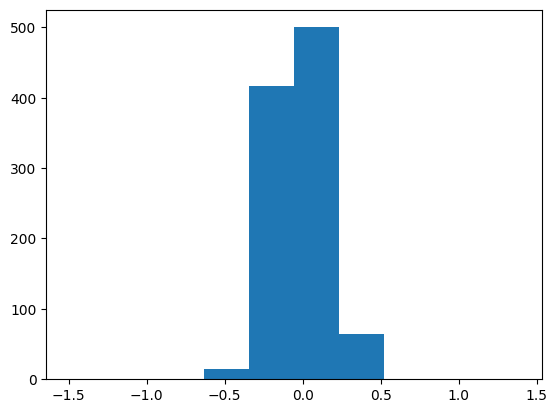

In [48]:
plt.hist(metrics["vwap"])

(array([ 17.,  28.,  49.,  52., 207., 352., 175.,  50.,  33.,  37.]),
 array([-1.69104004, -1.37415771, -1.05727539, -0.74039307, -0.42351074,
        -0.10662842,  0.21025391,  0.52713623,  0.84401855,  1.16090088,
         1.4777832 ]),
 <BarContainer object of 10 artists>)

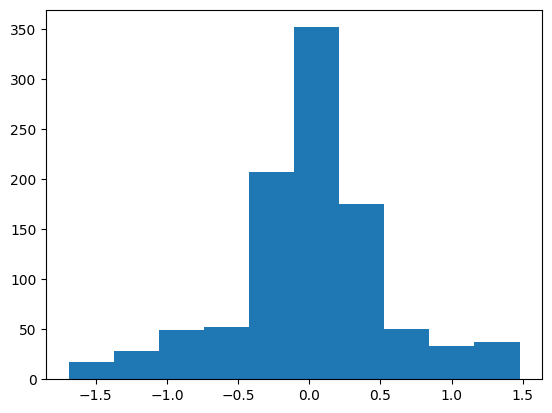

In [50]:
plt.hist(metrics["mid"])